In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style="ticks")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df['region'].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

Induce normality in target variable with log transformation

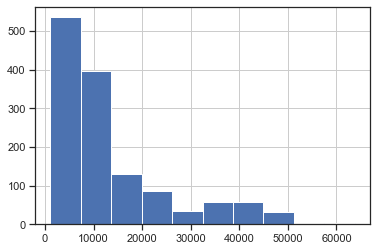

In [6]:
df['charges'].hist()

In [7]:
# df['log_charges'] = np.log(df['charges'])

In [8]:
# df['log_charges'].hist()

### Check if relationships are linear.

In [9]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


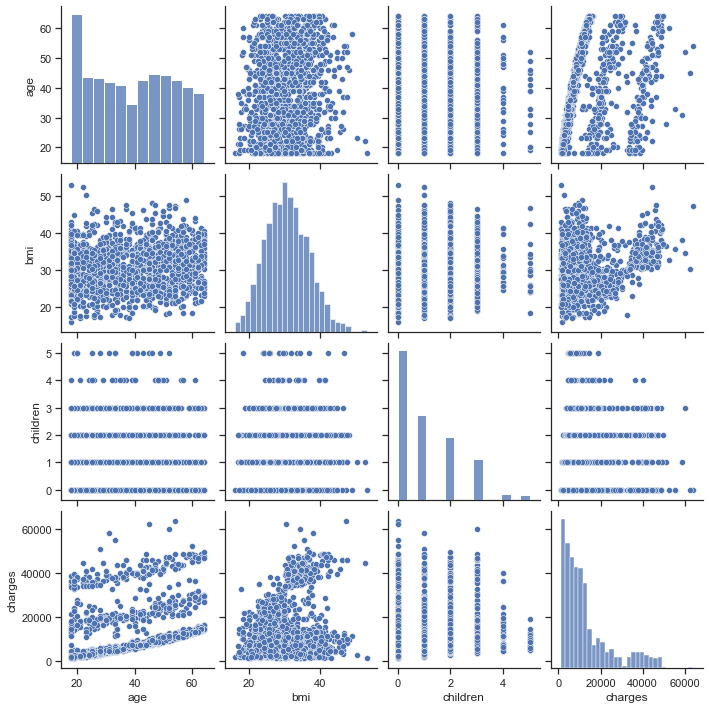

In [10]:
sns.pairplot(df)

### Test multicollinearity

In [11]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


### Train Test Split

In [12]:
X = df.drop('charges', axis=1)
y = df['charges']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=354)

### One Hot Encoding

#### Training Data

In [14]:
X_train_ohe = X_train.copy()

# Select the object (string) columns
mask = X_train_ohe.dtypes == np.object
categorical_cols = X_train_ohe.columns[mask]

dummies = pd.get_dummies(X_train_ohe[categorical_cols], drop_first=True)

In [15]:
X_train_ohe.drop(categorical_cols, axis=1, inplace=True)
X_train_ohe = pd.concat([X_train_ohe, dummies], axis=1)

#### Test Data

In [16]:
X_test_ohe = X_test.copy()

# Select the object (string) columns
mask = X_test_ohe.dtypes == np.object
categorical_cols = X_test_ohe.columns[mask]

dummies = pd.get_dummies(X_test_ohe[categorical_cols], drop_first=True)

In [17]:
X_test_ohe.drop(categorical_cols, axis=1, inplace=True)
X_test_ohe = pd.concat([X_test_ohe, dummies], axis=1)

### Simple Linear Regression

In [18]:
lr = LinearRegression()
lr.fit(X_train_ohe, y_train)


LinearRegression()

In [21]:
# Make predictions using the testing set
y_pred = lr.predict(X_test_ohe)

# The coefficients
print('Coefficients: \n', lr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('R-Squared: %.2f'
      % r2_score(y_test, y_pred))

# # Plot outputs
# plt.scatter(X_test_ohe, y_test,  color='black')
# plt.plot(X_test_ohe, y_pred, color='blue', linewidth=3)

# plt.xticks(())
# plt.yticks(())

# plt.show()

Coefficients: 
 [  261.27485951   331.59100466   491.92181679  -189.12340797
 24142.51475389  -385.93436917  -707.7485899  -1188.64799025]
Mean squared error: 34285739.73
R-Squared: 0.76


### Check residual assumptions

### Add Polynomial Effects

### Add Regularization